In [2]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import re

In [37]:
df = pd.read_csv("output/dev.results.summary.txt", header=None, delimiter=r"\s+",names=['c','d','acc','std'])

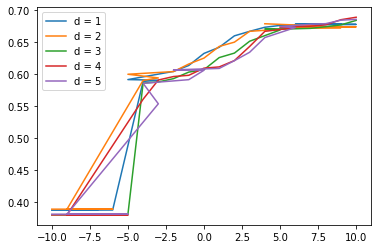

In [49]:
for d in range(1,6):
    a = df[df['d']==d]
    plt.plot(a['c'],a['acc']-np.std(a['acc']),label = 'd = '+str(d))
plt.legend()

plt.savefig('minius.jpg')

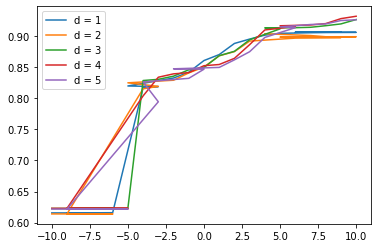

In [50]:
for d in range(1,6):
    a = df[df['d']==d]
    plt.plot(a['c'],a['acc']+np.std(a['acc']),label = 'd = '+str(d))
plt.legend()
plt.savefig('additn.jpg')

In [55]:
def read_mse(result):
    return float(result.split('\n')[-2].split('=')[-1].split('%')[0])
mse = {}
for d in range(1,6):
    a=0
    for c in range(-10,10):
        for sp in range(1,11):
            a = a+ read_mse(os.popen('./libsvm_latest/svm-predict data/test.scaled output/model.' + str(c)+ '.' + str(d)+'.' + str(sp)+ '.txt t').read())
            # print(mse[d])
    a = a/(20*10)
    mse[d] = a
            

In [56]:
mse

{1: 46.9827600000001,
 2: 48.97078050000007,
 3: 49.84338400000008,
 4: 49.08955050000008,
 5: 47.986103000000114}